In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf
import numpy as np
import pandas as pd

In [4]:
data = yf.download("BNB-USD", start="2021-03-01", end="2022-03-01")

[*********************100%***********************]  1 of 1 completed


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-01,209.951309,259.491058,209.951309,254.629929,254.629929,5008256561
2021-03-02,254.953354,264.169312,228.641647,239.522537,239.522537,5882262804
2021-03-03,239.688980,254.253632,236.908752,241.091370,241.091370,5827707431
2021-03-04,241.045486,249.465607,226.084946,229.945068,229.945068,5580339595
2021-03-05,229.835297,230.366638,216.272614,226.372559,226.372559,4969642573


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-25,361.216003,376.802612,357.366547,374.914948,374.914948,1839035023
2022-02-26,374.888580,385.210327,371.475037,373.638763,373.638763,1319208551
2022-02-27,373.599976,380.959076,359.625519,360.531036,360.531036,1600855952
2022-02-28,360.382172,396.457336,356.617584,395.612427,395.612427,1868349380
2022-03-01,395.624115,418.489960,391.329224,408.482300,408.482300,2885318336


In [7]:
data['Adj Close'].head()

Date
2021-03-01    254.629929
2021-03-02    239.522537
2021-03-03    241.091370
2021-03-04    229.945068
2021-03-05    226.372559
Name: Adj Close, dtype: float64

array([<AxesSubplot:xlabel='Date'>], dtype=object)

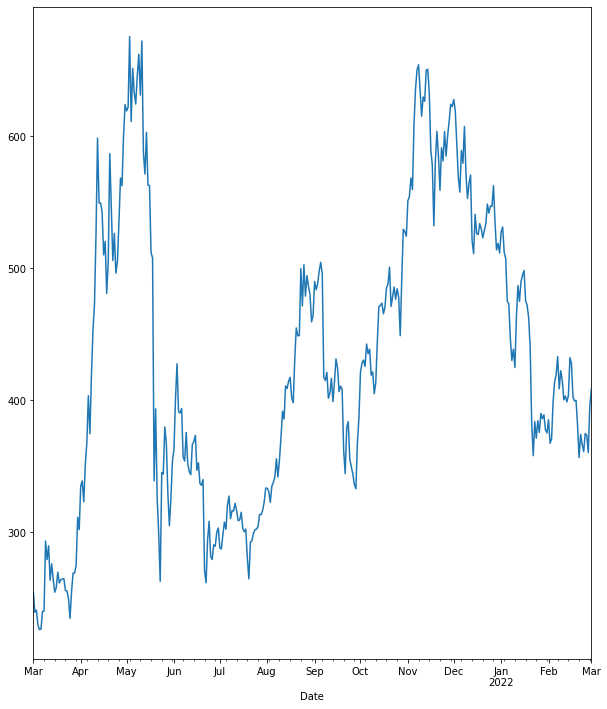

In [8]:
data['Adj Close'].plot(figsize=(10, 12), subplots=True)

In [9]:
normal_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
normal_return[:5]

[-0.05933077639830275,
 0.006549832076741111,
 -0.04623268467339959,
 -0.015536361754197833,
 0.0013000527381792062]

In [10]:
log_return = []
for i in range(0,len(data)-1):
    adjclose_yesterday = data.iloc[i]['Adj Close']
    adjclose_today = data.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
log_return[:5]

[-0.06116371702534487,
 0.0065284751321675214,
 -0.047335541553145274,
 -0.015658315819880267,
 0.0012992084013272779]

In [11]:
dflr = pd.DataFrame(log_return, columns = ['log']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annulized log return is %.8f and its annulized volatility is %.8f' % (lr,lv))

The annulized log return is 0.47263735 and its annulized volatility is 1.11509591


In [12]:
import os

In [13]:
S0 = 209.951            # spot stock price
K = 500              # strike
T = 1.0                 # maturity 
r = 0.011                 # risk free rate 
sig = 1.115               # diffusion coefficient or volatility
N = 3                   # number of periods or number of time steps  
payoff = "put"          # payoff

In [14]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u       

In [15]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [16]:
S


array([[ 209.951     ,  399.66221198,  760.79601282, 1448.24943608],
       [   0.        ,  110.29169403,  209.951     ,  399.66221198],
       [   0.        ,    0.        ,   57.93855601,  110.29169403],
       [   0.        ,    0.        ,    0.        ,   30.43634702]])

In [17]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.34706555482802115

In [18]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , 100.33778802],
       [  0.        ,   0.        ,   0.        , 389.70830597],
       [  0.        ,   0.        ,   0.        , 469.56365298]])

In [19]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[323.78760926, 210.07088783,  65.27421982,   0.        ],
       [  0.        , 386.05505094, 288.21902367, 100.33778802],
       [  0.        ,   0.        , 440.23146766, 389.70830597],
       [  0.        ,   0.        ,   0.        , 469.56365298]])

In [20]:
print('European ' + payoff, str( V[0,0]))

European put 323.78760926194275


In [21]:
# for American Option
if payoff =="call":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(S[i,j] - K,np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
elif payoff =="put":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(K - S[i,j],np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
V

array([[326.575878  , 211.2613693 ,  65.27421982,   0.        ],
       [  0.        , 389.70830597, 290.049     , 100.33778802],
       [  0.        ,   0.        , 442.06144399, 389.70830597],
       [  0.        ,   0.        ,   0.        , 469.56365298]])

In [22]:
print('American ' + payoff, str( V[0,0]))

American put 326.57587799784994


In [23]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [24]:
T = 1
r = 0.011
sigma = 1.115
S0 = 100
K = 500

In [25]:
S = mcs_simulation_np(1000)

In [26]:
S = np.transpose(S)
S

array([[100.        ,  93.19759389,  96.36000271, ...,  22.31877879,
         23.43377531,  24.57182726],
       [100.        ,  99.69002956,  99.16365314, ...,  24.91537239,
         25.62874262,  25.55087702],
       [100.        ,  97.59125373,  95.10267268, ...,   9.20387416,
          9.62633599,   9.51078655],
       ...,
       [100.        , 102.52546079,  97.06416933, ...,  16.63429405,
         16.35641117,  16.71793245],
       [100.        ,  97.00052265,  93.90205177, ..., 263.70733442,
        256.29820511, 249.60042078],
       [100.        ,  98.24262784,  95.25504092, ...,  51.585224  ,
         50.78373364,  52.98089243]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

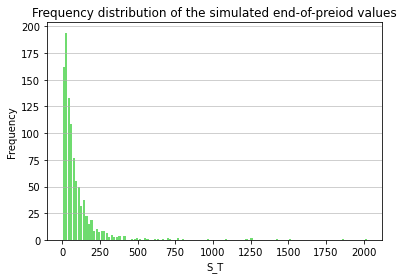

In [29]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#32cd32',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [30]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 411.9262608452851


In [31]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 10.154680855376188
